In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [2]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

`1.Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function`

In [11]:
dcm = pydicom.dcmread('dicom_00029579_005.dcm')

`2.Visualize the image using plt.imshow`

<IPython.core.display.Javascript object>


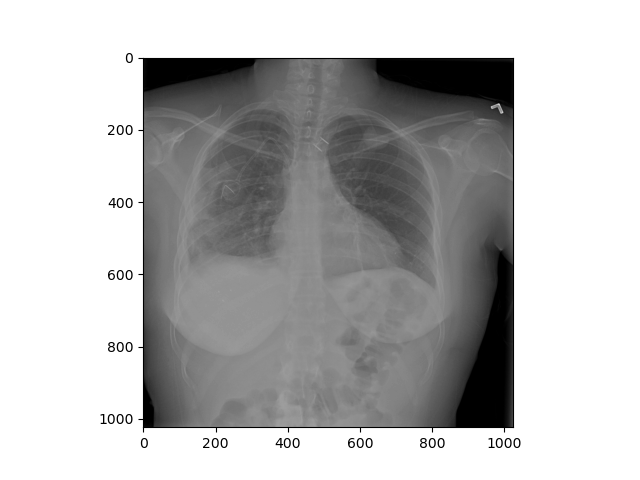

In [12]:
plt.imshow(dcm.pixel_array, cmap='gray')

`3.Plot a histogram of the image pixel intensity values`

<IPython.core.display.Javascript object>


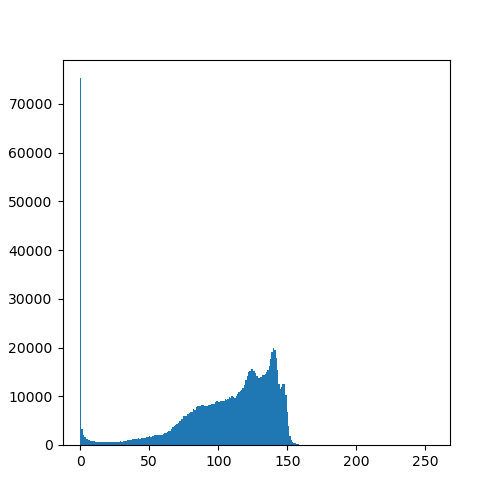

(array([7.5257e+04, 3.2400e+03, 2.0070e+03, 1.6990e+03, 1.3230e+03,
        1.1500e+03, 1.0230e+03, 8.8300e+02, 8.8200e+02, 8.3800e+02,
        7.9000e+02, 6.8100e+02, 6.6600e+02, 6.4200e+02, 5.5100e+02,
        5.8200e+02, 5.9100e+02, 5.2500e+02, 5.5200e+02, 5.7700e+02,
        5.2600e+02, 5.6300e+02, 5.5100e+02, 5.4700e+02, 5.9500e+02,
        5.9300e+02, 6.0300e+02, 6.3800e+02, 6.5600e+02, 7.2000e+02,
        7.1500e+02, 7.8000e+02, 8.3400e+02, 9.1000e+02, 9.7000e+02,
        9.4900e+02, 1.0210e+03, 1.0620e+03, 1.1390e+03, 1.1460e+03,
        1.2310e+03, 1.2570e+03, 1.3500e+03, 1.2810e+03, 1.3580e+03,
        1.4710e+03, 1.4820e+03, 1.4660e+03, 1.5910e+03, 1.6740e+03,
        1.8090e+03, 1.7390e+03, 1.8070e+03, 1.8360e+03, 1.9610e+03,
        2.0430e+03, 1.9570e+03, 2.0190e+03, 1.9730e+03, 2.0210e+03,
        2.2260e+03, 2.4030e+03, 2.4010e+03, 2.6180e+03, 2.8080e+03,
        2.9310e+03, 3.3110e+03, 3.6500e+03, 3.8790e+03, 4.1520e+03,
        4.2900e+03, 4.5400e+03, 4.8760e+03, 5.25

In [13]:
plt.figure(figsize=(5,5))
plt.hist(dcm.pixel_array.ravel(), bins=256)

`4.Find the mean and standard deviation of intensity values of the image, and standardize it`

In [14]:
mean_intensity = np.mean(dcm.pixel_array)
mean_intensity

101.89211559295654

In [15]:
std_intensity = np.std(dcm.pixel_array)
std_intensity

41.3243239684574

In [16]:
new_image = dcm.pixel_array.copy()
new_image = (new_image - mean_intensity)/std_intensity

`5.Re-plot a histogram of the normalized intensity values`

<IPython.core.display.Javascript object>


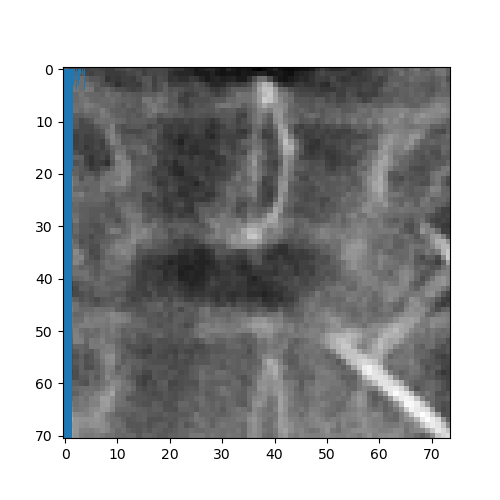

(array([7.5257e+04, 3.2400e+03, 2.0070e+03, 1.6990e+03, 1.3230e+03,
        1.1500e+03, 1.0230e+03, 8.8300e+02, 8.8200e+02, 8.3800e+02,
        7.9000e+02, 6.8100e+02, 6.6600e+02, 6.4200e+02, 5.5100e+02,
        5.8200e+02, 5.9100e+02, 5.2500e+02, 5.5200e+02, 5.7700e+02,
        5.2600e+02, 5.6300e+02, 5.5100e+02, 5.4700e+02, 5.9500e+02,
        5.9300e+02, 6.0300e+02, 6.3800e+02, 6.5600e+02, 7.2000e+02,
        7.1500e+02, 7.8000e+02, 8.3400e+02, 9.1000e+02, 9.7000e+02,
        9.4900e+02, 1.0210e+03, 1.0620e+03, 1.1390e+03, 1.1460e+03,
        1.2310e+03, 1.2570e+03, 1.3500e+03, 1.2810e+03, 1.3580e+03,
        1.4710e+03, 1.4820e+03, 1.4660e+03, 1.5910e+03, 1.6740e+03,
        1.8090e+03, 1.7390e+03, 1.8070e+03, 1.8360e+03, 1.9610e+03,
        2.0430e+03, 1.9570e+03, 2.0190e+03, 1.9730e+03, 2.0210e+03,
        2.2260e+03, 2.4030e+03, 2.4010e+03, 2.6180e+03, 2.8080e+03,
        2.9310e+03, 3.3110e+03, 3.6500e+03, 3.8790e+03, 4.1520e+03,
        4.2900e+03, 4.5400e+03, 4.8760e+03, 5.25

In [27]:
plt.figure(figsize=(5,5))
plt.hist(new_image.ravel(), bins=256)

`6.Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow`

In [28]:
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


In [29]:
plt.imshow(dcm.pixel_array[189:(189+71),420:(420+74)],cmap='gray')

`7.Plot a histogram of the normalized intensity values of the mass`

<IPython.core.display.Javascript object>


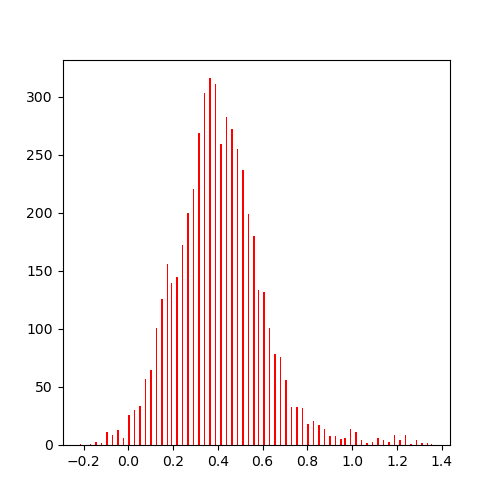

In [30]:
plt.figure(figsize=(5,5))
plt.hist(new_image[189:(189+71),420:(420+74)].ravel(), bins = 256,color='red')
plt.show()